In [ ]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upload dataset
files.upload()

In [ ]:
# upload best weights
files.upload()

In [ ]:
v= pd.read_csv("y_dataset.csv")
h= pd.read_csv("x_dataset.csv")
vnum=v.to_numpy()
hnum=h.to_numpy()
vnum=vnum.astype(np.float32)
hnum=hnum.astype(np.float32)
# train_test_split
train,test = train_test_split(vnum,test_size=0.2,random_state=42)
test.shape

(14, 200)

In [ ]:
def plot_image(x,y,n):
  plt.figure(figsize=(20,1))
  plt.scatter(x,y)
  plt.plot(x,y)
  plt.axis('off')
  plt.title(f"{n}")
  plt.show()

In [ ]:
class Sampling(keras.layers.Layer):
  def call(self,inputs):
    mean,log_var=inputs
    return keras.backend.random_normal(shape= tf.shape(log_var)) * keras.backend.exp(log_var/2) + mean

In [ ]:
codings_size=10
# Encoder
inputs=keras.layers.Input(shape=(200,))
z=keras.layers.Dense(150, activation=keras.layers.LeakyReLU(alpha=0.1))(inputs)
z=keras.layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.1))(z)
codings_mean=keras.layers.Dense(codings_size)(z)
codings_log_var=keras.layers.Dense(codings_size)(z)
codings=Sampling()([codings_mean,codings_log_var])
encoder=keras.models.Model(inputs=[inputs],outputs=[codings])
# Decoder
decoder_inputs=keras.layers.Input(shape=[codings_size])
x=keras.layers.Dense(100,activation=keras.layers.LeakyReLU(alpha=0.1))(decoder_inputs)
x=keras.layers.Dense(150,activation=keras.layers.LeakyReLU(alpha=0.1))(x)
outputs=keras.layers.Dense(200,activation="tanh")(x)
decoder=keras.models.Model(inputs=[decoder_inputs],outputs=[outputs])

# VAE
codings=encoder(inputs)
reconstructions=decoder(codings)
vae=keras.models.Model(inputs=[inputs], outputs=[reconstructions])
# loss
latent_loss= -0.5* keras.backend.sum(1 + codings_log_var - keras.backend.exp(codings_log_var)- keras.backend.square(codings_mean), axis=-1)
vae.add_loss(keras.backend.mean(latent_loss)/200.)
optimizer=keras.optimizers.Adam(learning_rate=0.0005)
filepath="vae_5_70.h5"
vae.load_weights(filepath)
vae.compile(loss="mean_squared_error", optimizer=optimizer)

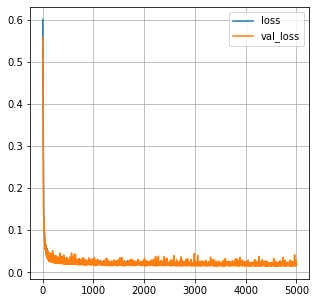

In [ ]:
pd.DataFrame(training.history).plot(figsize=(5,5))
plt.grid(True)

In [ ]:
vae.evaluate(test, test)

1/1 [==============================] - 0s 22ms/step - loss: 0.0174


0.017429381608963013

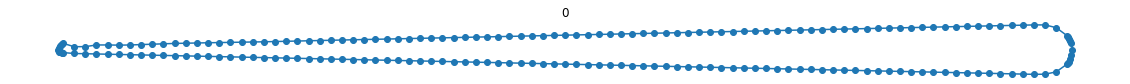

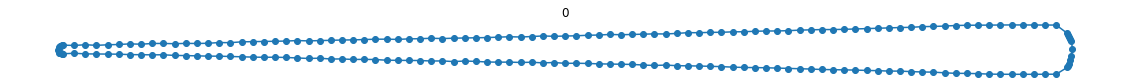

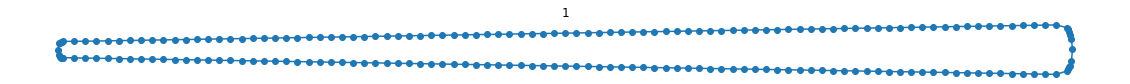

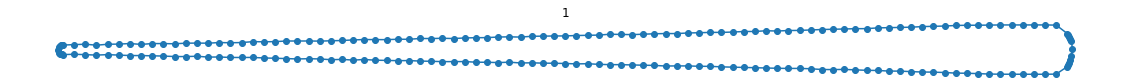

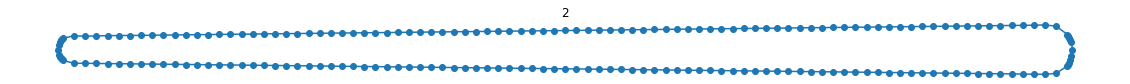

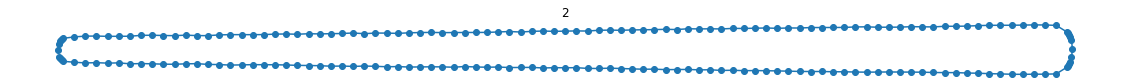

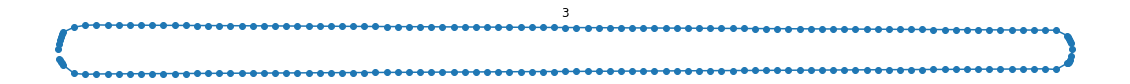

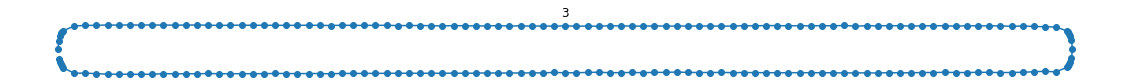

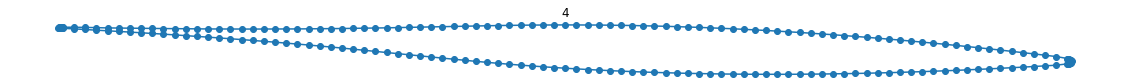

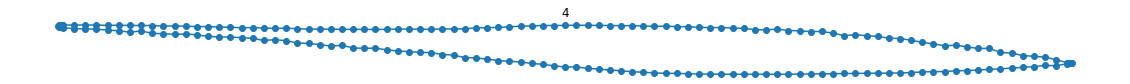

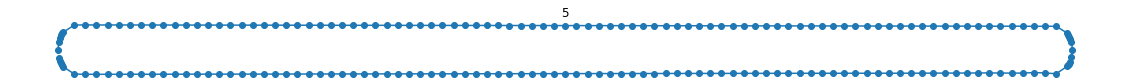

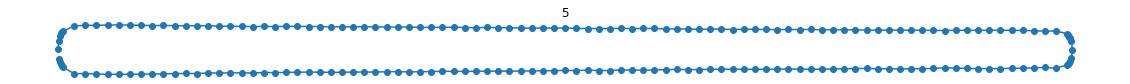

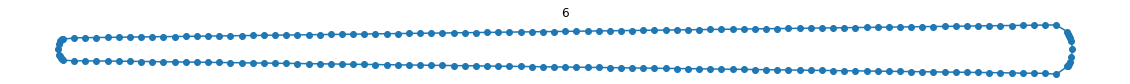

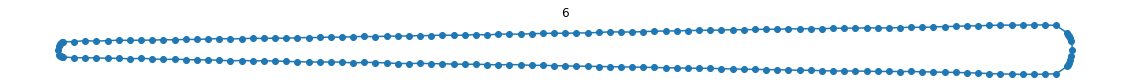

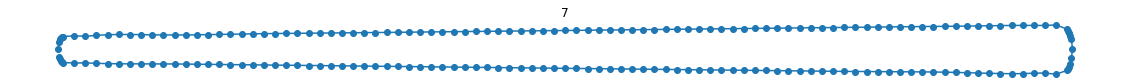

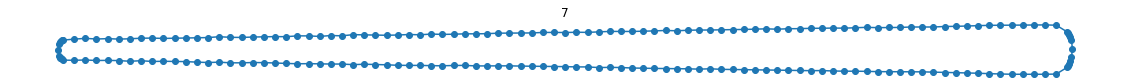

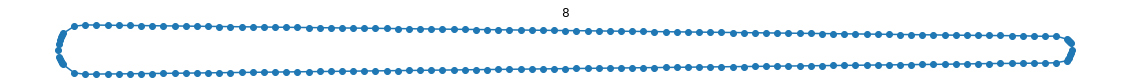

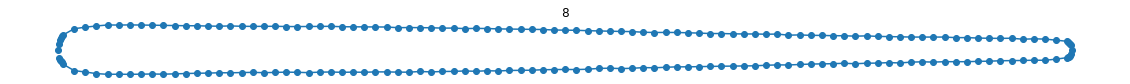

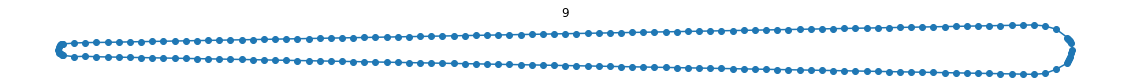

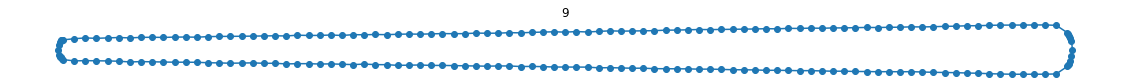

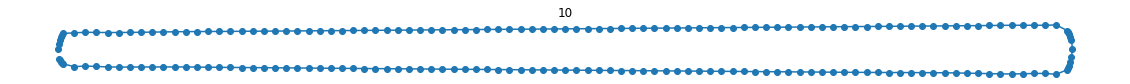

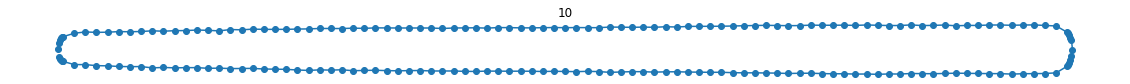

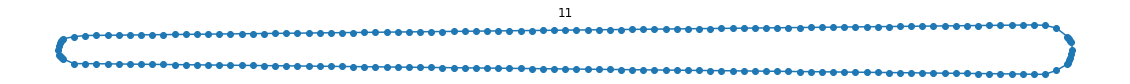

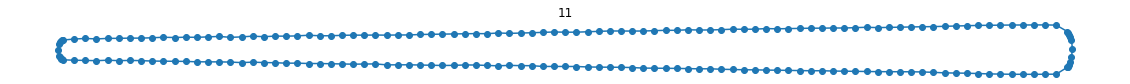

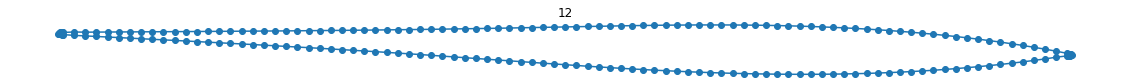

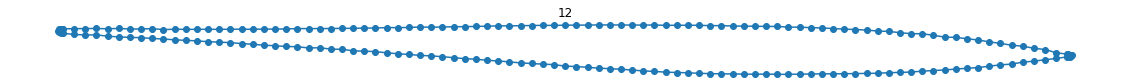

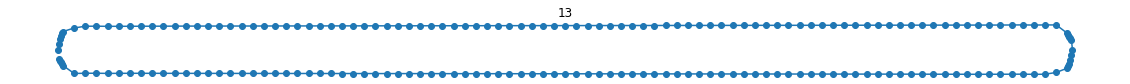

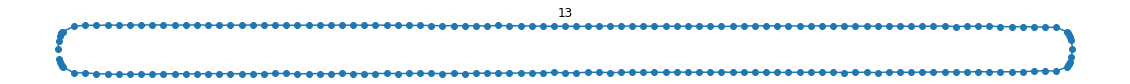

In [ ]:
                                                                  ######## tset #######
for i in range(0,len(test)):
    x_test=test[i].reshape(1,-1)
    y_pre=vae.predict(x_test)
    ypre=y_pre.flatten()
    plot_image(hnum[0],test[i],i)
    plot_image(hnum[0],ypre,i)

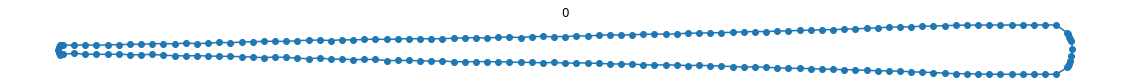

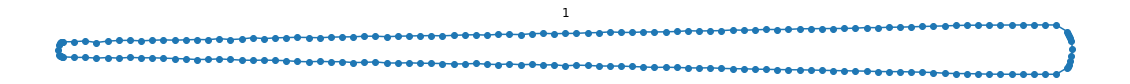

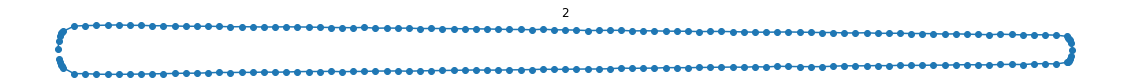

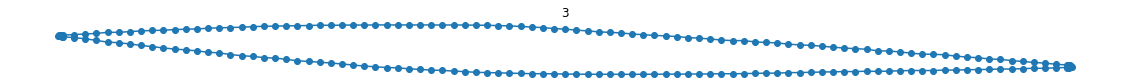

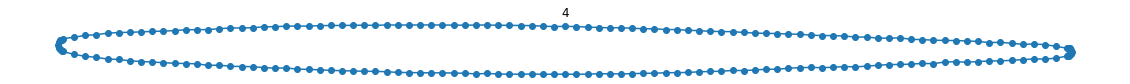

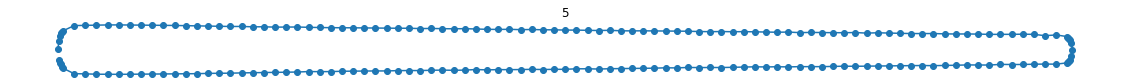

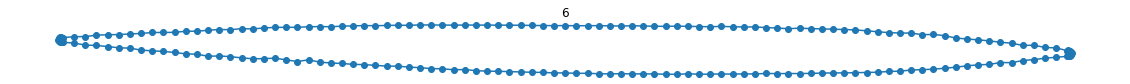

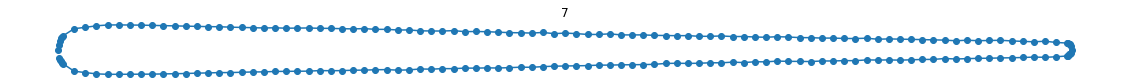

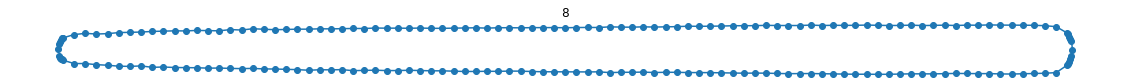

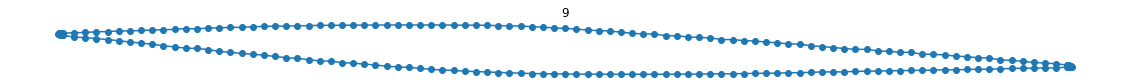

In [ ]:
                                                          ############# Random + VAE(decoder) ###########
for i in range(10):
  noise=tf.random.normal(shape=[1,codings_size],seed=i)
  random_sample=decoder(noise)
  random_sample=tf.reshape(random_sample,[200])
  plot_image(hnum[0],random_sample,i)

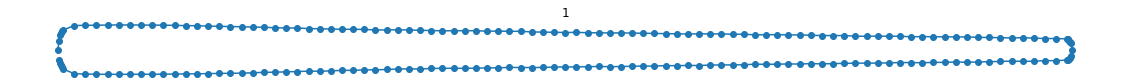

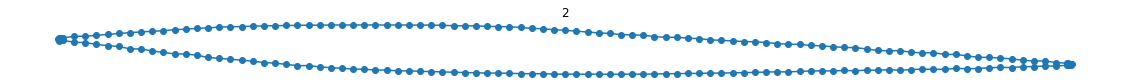

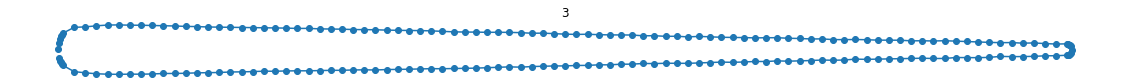

In [ ]:
                    ############## Interpolation / Extrapolation ##############

train1=train[1].reshape(1,-1)
train2=train[2].reshape(1,-1)
z1=encoder(train1)
z2=encoder(train2)
neu=0.5
z3=neu*z1+(1-neu)*z2

x1=decoder(z1)
x1=tf.reshape(x1,[200])
plot_image(hnum[0],x1,1)
x2=decoder(z2)
x2=tf.reshape(x2,[200])
plot_image(hnum[0],x2,2)
x3=decoder(z3)
x3=tf.reshape(x3,[200])
plot_image(hnum[0],x3,3)

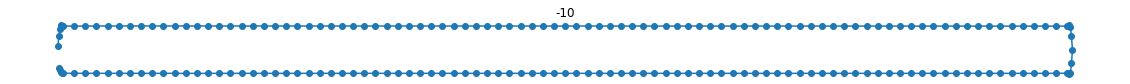

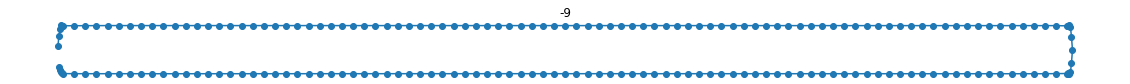

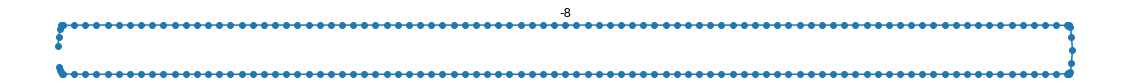

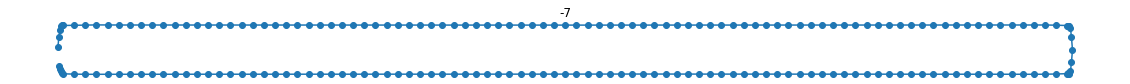

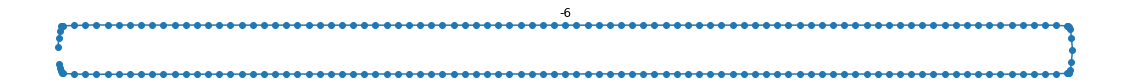

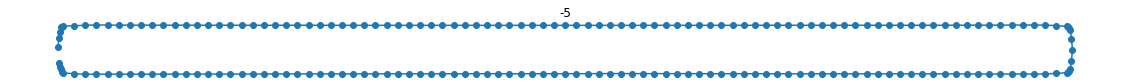

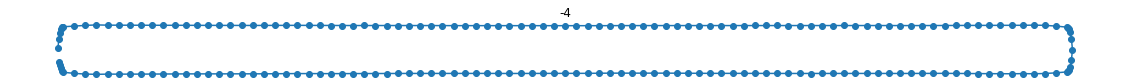

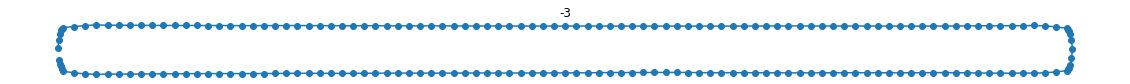

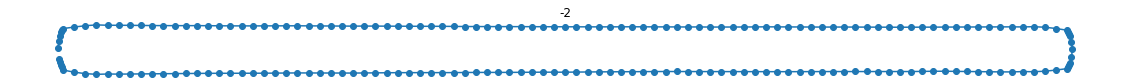

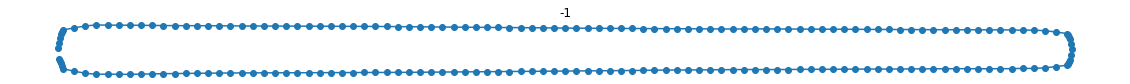

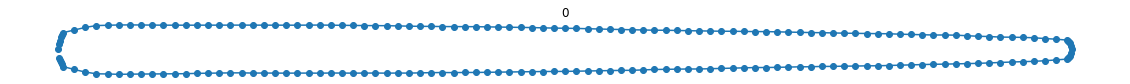

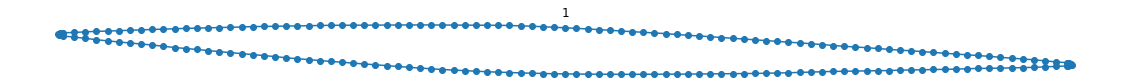

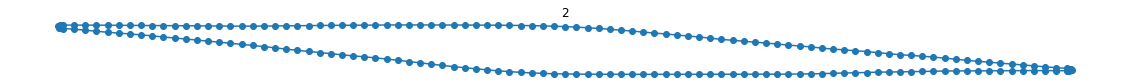

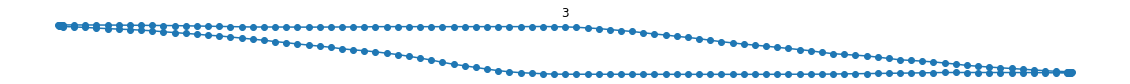

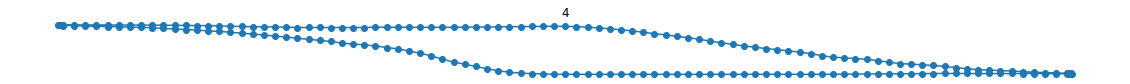

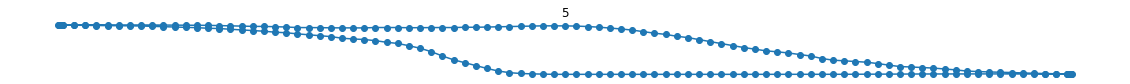

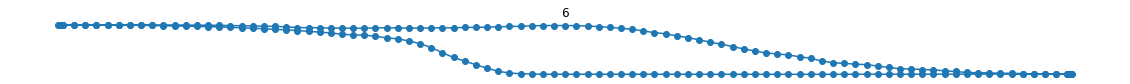

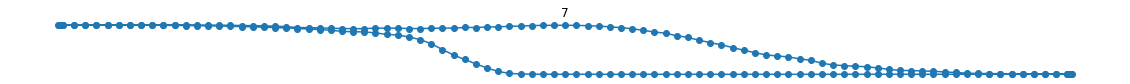

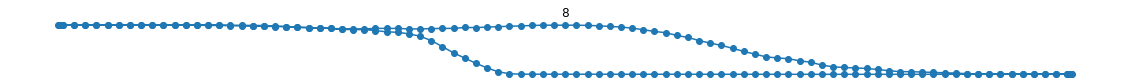

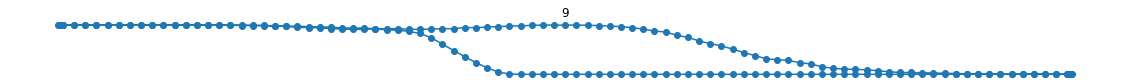

In [ ]:
# Manual changes
i=1
noise=np.zeros(codings_size)
noise=noise.reshape(1,-1)
for i in range(-10,10):
  noise[0][0]=i  # 0, 1, 2, 7
  random_sample=decoder(noise)
  random_sample=tf.reshape(random_sample,[200])
  plot_image(hnum[0],random_sample,i)